# Aprikosenbäume Entwicklungsprognose

## Überblick
Dieses Notebook analysiert und prognostiziert die Entwicklung eines Aprikosenbaumbestands über einen definierten Zeitraum. 

## Geschäftsmodell
- **Startbestand**: 60.000 Aprikosenbäume zum Stichtag 01.05.2025
- **Monatliche Zugänge**: Konstant 1.800 neue Bäume pro Monat
- **Jährliches Wachstum**: 7% des Gesamtbestands pro Jahr
- **Prognosezeitraum**: 5 Jahre (anpassbar)

## Berechnungslogik
Das Wachstum erfolgt kontinuierlich und berücksichtigt sowohl:
1. **Lineare Zugänge**: Feste monatliche Neupflanzungen
2. **Exponentielles Wachstum**: Prozentuale Steigerung des Gesamtbestands

Die monatliche Berechnung erfolgt nach der Formel:
```
Neuer Bestand = Vorheriger Bestand × Monatlicher Wachstumsfaktor + Monatliche Zugänge
```

Dabei ist der monatliche Wachstumsfaktor = (1 + jährliches Wachstum)^(1/12)

In [3]:
# Importiere erforderliche Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Konfiguration für bessere Darstellung
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

print("✅ Alle Bibliotheken erfolgreich importiert")



✅ Alle Bibliotheken erfolgreich importiert


## 1. Konfiguration der Parameter

In diesem Abschnitt definieren wir alle wichtigen Parameter für unsere Prognose. 
Diese Werte können jederzeit angepasst werden, um verschiedene Szenarien zu testen.

In [5]:
# Konfiguration der Prognoseparameter
class AprikosenbaumPrognose:
    def __init__(self):
        # Grundparameter
        self.startdatum = datetime(2025, 5, 1)
        self.startbestand = 60000
        self.monatliche_zugaenge = 2000
        self.jaehrliches_wachstum_prozent = 7.0
        self.prognosejahre = 5
        
        # Berechnete Werte
        self.monate_gesamt = self.prognosejahre * 12
        self.monatlicher_wachstumsfaktor = (1 + self.jaehrliches_wachstum_prozent/100) ** (1/12)
        
        # Datenstrukturen für Ergebnisse
        self.monatsdaten = pd.DataFrame()
        self.jahresdaten = pd.DataFrame()
        
    def zeige_parameter(self):
        """Zeigt die aktuellen Parameter an"""
        print("📊 PROGNOSEPARAMETER")
        print("=" * 40)
        print(f"Startdatum: {self.startdatum.strftime('%d.%m.%Y')}")
        print(f"Startbestand: {self.startbestand:,} Bäume")
        print(f"Monatliche Zugänge: {self.monatliche_zugaenge:,} Bäume")
        print(f"Jährliches Wachstum: {self.jaehrliches_wachstum_prozent}%")
        print(f"Prognosezeitraum: {self.prognosejahre} Jahre")
        print(f"Monatlicher Wachstumsfaktor: {self.monatlicher_wachstumsfaktor:.6f}")
        print("=" * 40)

# Erstelle Prognose-Instanz
prognose = AprikosenbaumPrognose()
prognose.zeige_parameter()



📊 PROGNOSEPARAMETER
Startdatum: 01.05.2025
Startbestand: 60,000 Bäume
Monatliche Zugänge: 2,000 Bäume
Jährliches Wachstum: 7.0%
Prognosezeitraum: 5 Jahre
Monatlicher Wachstumsfaktor: 1.005654


## 2. Berechnung der monatlichen Entwicklung

Die Kernfunktion berechnet die Entwicklung des Baumbestands für jeden Monat über den gesamten Prognosezeitraum.

In [7]:
def berechne_monatliche_entwicklung(prognose_obj):
    """
    Berechnet die monatliche Entwicklung des Baumbestands
    
    Returns:
        pd.DataFrame: Monatliche Daten mit Datum, Bestand und Wachstum
    """
    
    # Initialisiere Datenstrukturen
    daten = []
    aktueller_bestand = prognose_obj.startbestand
    
    print("🔄 Berechne monatliche Entwicklung...")
    
    for monat in range(1, prognose_obj.monate_gesamt + 1):
        # Berechne aktuelles Datum
        aktuelles_datum = prognose_obj.startdatum + timedelta(days=30.44 * (monat - 1))
        
        # Berechne Jahr und Monat der Prognose
        prognosejahr = ((monat - 1) // 12) + 1
        prognose_monat = ((monat - 1) % 12) + 1
        
        # Speichere aktuelle Daten
        daten.append({
            'Monat': monat,
            'Datum': aktuelles_datum,
            'Prognosejahr': prognosejahr,
            'Prognose_Monat': prognose_monat,
            'Kalenderjahr': aktuelles_datum.year,
            'Kalendermonat': aktuelles_datum.month,
            'Monatsname': aktuelles_datum.strftime('%B %Y'),
            'Baumbestand': round(aktueller_bestand),
            'Monatlicher_Zuwachs': round(aktueller_bestand * (prognose_obj.monatlicher_wachstumsfaktor - 1) + prognose_obj.monatliche_zugaenge),
            'Wachstum_Prozent': round((aktueller_bestand * (prognose_obj.monatlicher_wachstumsfaktor - 1) / aktueller_bestand) * 100, 4),
            'Zugaenge_Fix': prognose_obj.monatliche_zugaenge
        })
        
        # Berechne neuen Bestand für nächsten Monat
        aktueller_bestand = aktueller_bestand * prognose_obj.monatlicher_wachstumsfaktor + prognose_obj.monatliche_zugaenge
    
    # Erstelle DataFrame
    df = pd.DataFrame(daten)
    
    # Berechne kumulierte Werte
    df['Gesamtzuwachs'] = df['Baumbestand'] - prognose_obj.startbestand
    df['Gesamtwachstum_Prozent'] = ((df['Baumbestand'] / prognose_obj.startbestand) - 1) * 100
    
    print(f"✅ Berechnung abgeschlossen: {len(df)} Monate berechnet")
    
    return df

# Berechne die monatlichen Daten
prognose.monatsdaten = berechne_monatliche_entwicklung(prognose)

# Zeige die ersten 5 Datensätze
print("\n📋 Erste 5 Monate der Prognose:")
print(prognose.monatsdaten[['Datum', 'Monatsname', 'Baumbestand', 'Monatlicher_Zuwachs']].head())



🔄 Berechne monatliche Entwicklung...
✅ Berechnung abgeschlossen: 60 Monate berechnet

📋 Erste 5 Monate der Prognose:
                Datum   Monatsname  Baumbestand  Monatlicher_Zuwachs
0 2025-05-01 00:00:00     May 2025        60000                 2339
1 2025-05-31 10:33:36     May 2025        62339                 2352
2 2025-06-30 21:07:12    June 2025        64692                 2366
3 2025-07-31 07:40:48    July 2025        67058                 2379
4 2025-08-30 18:14:24  August 2025        69437                 2393


## 3. Berechnung der jährlichen Zusammenfassung

Für eine bessere Übersicht erstellen wir eine Zusammenfassung der Entwicklung am Ende jedes Prognosejahres.

In [9]:
def berechne_jaehrliche_zusammenfassung(monatsdaten):
    """
    Erstellt eine jährliche Zusammenfassung basierend auf den monatlichen Daten
    
    Returns:
        pd.DataFrame: Jährliche Zusammenfassung
    """
    
    print("📅 Erstelle jährliche Zusammenfassung...")
    
    # Filtere Dezember-Daten (Ende jedes Prognosejahres)
    jahresende_daten = monatsdaten[monatsdaten['Prognose_Monat'] == 12].copy()
    
    # Berechne zusätzliche Kennzahlen
    jahresende_daten['Vorjahr_Bestand'] = jahresende_daten['Baumbestand'].shift(1)
    jahresende_daten['Jaehrlicher_Zuwachs'] = jahresende_daten['Baumbestand'] - jahresende_daten['Vorjahr_Bestand']
    jahresende_daten['Jaehrliches_Wachstum_Prozent'] = ((jahresende_daten['Baumbestand'] / jahresende_daten['Vorjahr_Bestand']) - 1) * 100
    
    # Für das erste Jahr: Vergleich mit Startbestand
    jahresende_daten.loc[jahresende_daten['Prognosejahr'] == 1, 'Vorjahr_Bestand'] = prognose.startbestand
    jahresende_daten.loc[jahresende_daten['Prognosejahr'] == 1, 'Jaehrlicher_Zuwachs'] = \
        jahresende_daten.loc[jahresende_daten['Prognosejahr'] == 1, 'Baumbestand'] - prognose.startbestand
    jahresende_daten.loc[jahresende_daten['Prognosejahr'] == 1, 'Jaehrliches_Wachstum_Prozent'] = \
        ((jahresende_daten.loc[jahresende_daten['Prognosejahr'] == 1, 'Baumbestand'] / prognose.startbestand) - 1) * 100
    
    # Bereinige die Daten
    jahresende_daten = jahresende_daten.round(2)
    
    print(f"✅ Jährliche Zusammenfassung erstellt: {len(jahresende_daten)} Jahre")
    
    return jahresende_daten[['Prognosejahr', 'Kalenderjahr', 'Datum', 'Baumbestand', 
                           'Jaehrlicher_Zuwachs', 'Jaehrliches_Wachstum_Prozent', 'Gesamtzuwachs']]

# Berechne jährliche Daten
prognose.jahresdaten = berechne_jaehrliche_zusammenfassung(prognose.monatsdaten)

# Zeige die jährliche Zusammenfassung
print("\n📊 Jährliche Zusammenfassung:")
print(prognose.jahresdaten.to_string(index=False))



📅 Erstelle jährliche Zusammenfassung...
✅ Jährliche Zusammenfassung erstellt: 5 Jahre

📊 Jährliche Zusammenfassung:
 Prognosejahr  Kalenderjahr               Datum  Baumbestand  Jaehrlicher_Zuwachs  Jaehrliches_Wachstum_Prozent  Gesamtzuwachs
            1          2026 2026-03-31 20:09:36        86472              26472.0                         44.12          26472
            2          2027 2027-04-01 02:52:48       117285              30813.0                         35.63          57285
            3          2028 2028-03-31 09:36:00       150256              32971.0                         28.11          90256
            4          2029 2029-03-31 16:19:12       185534              35278.0                         23.48         125534
            5          2030 2030-03-31 23:02:24       223282              37748.0                         20.35         163282


## 4. Datenvisualisierung

In diesem Abschnitt erstellen wir aussagekräftige Visualisierungen der Baumbestandsentwicklung.

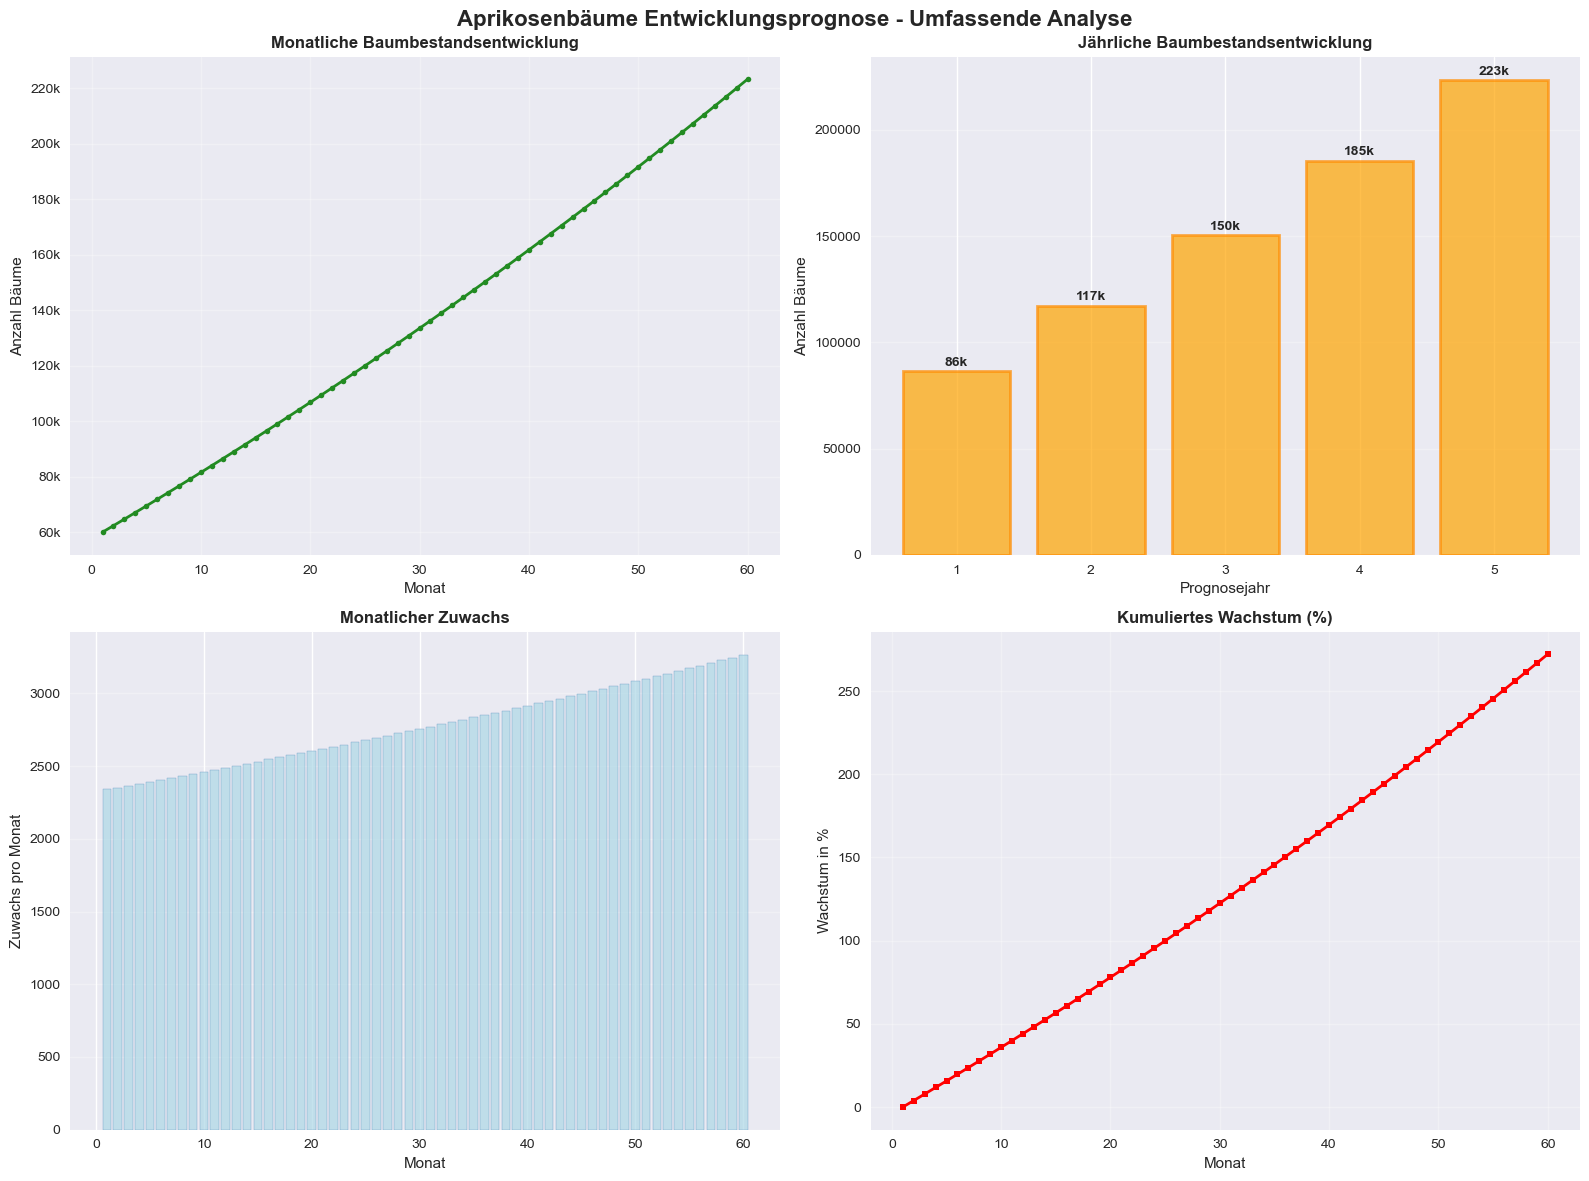

In [11]:
def erstelle_visualisierungen(monatsdaten, jahresdaten):
    """
    Erstellt umfassende Visualisierungen der Prognose
    """
    
    # Erstelle Subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Aprikosenbäume Entwicklungsprognose - Umfassende Analyse', fontsize=16, fontweight='bold')
    
    # 1. Monatliche Entwicklung (Liniengrafik)
    ax1 = axes[0, 0]
    ax1.plot(monatsdaten['Monat'], monatsdaten['Baumbestand'], 
             marker='o', linewidth=2, markersize=4, color='forestgreen')
    ax1.set_title('Monatliche Baumbestandsentwicklung', fontweight='bold')
    ax1.set_xlabel('Monat')
    ax1.set_ylabel('Anzahl Bäume')
    ax1.grid(True, alpha=0.3)
    ax1.ticklabel_format(style='plain', axis='y')
    
    # Formatiere Y-Achse
    y_ticks = ax1.get_yticks()
    ax1.set_yticklabels([f'{int(y/1000)}k' for y in y_ticks])
    
    # 2. Jährliche Entwicklung (Balkendiagramm)
    ax2 = axes[0, 1]
    bars = ax2.bar(jahresdaten['Prognosejahr'], jahresdaten['Baumbestand'], 
                   color='orange', alpha=0.7, edgecolor='darkorange', linewidth=2)
    ax2.set_title('Jährliche Baumbestandsentwicklung', fontweight='bold')
    ax2.set_xlabel('Prognosejahr')
    ax2.set_ylabel('Anzahl Bäume')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Füge Werte auf Balken hinzu
    for bar, value in zip(bars, jahresdaten['Baumbestand']):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                f'{int(value/1000)}k', ha='center', va='bottom', fontweight='bold')
    
    # 3. Monatlicher Zuwachs
    ax3 = axes[1, 0]
    ax3.bar(monatsdaten['Monat'], monatsdaten['Monatlicher_Zuwachs'], 
            color='lightblue', alpha=0.7, edgecolor='steelblue')
    ax3.set_title('Monatlicher Zuwachs', fontweight='bold')
    ax3.set_xlabel('Monat')
    ax3.set_ylabel('Zuwachs pro Monat')
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Kumuliertes Wachstum in Prozent
    ax4 = axes[1, 1]
    ax4.plot(monatsdaten['Monat'], monatsdaten['Gesamtwachstum_Prozent'], 
             marker='s', linewidth=2, markersize=4, color='red')
    ax4.set_title('Kumuliertes Wachstum (%)', fontweight='bold')
    ax4.set_xlabel('Monat')
    ax4.set_ylabel('Wachstum in %')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Erstelle Visualisierungen
visualisierung = erstelle_visualisierungen(prognose.monatsdaten, prognose.jahresdaten)



## 5. Statistische Analyse und Kennzahlen

Hier berechnen wir wichtige statistische Kennzahlen für eine tiefere Analyse der Prognose.

In [13]:
def berechne_statistiken(monatsdaten, jahresdaten, prognose_obj):
    """
    Berechnet wichtige statistische Kennzahlen
    """
    
    print("📈 STATISTISCHE ANALYSE")
    print("=" * 60)
    
    # Grunddaten
    start_bestand = prognose_obj.startbestand
    end_bestand = jahresdaten['Baumbestand'].iloc[-1]
    gesamtwachstum = end_bestand - start_bestand
    
    print(f"🌱 GRUNDDATEN:")
    print(f"   Startdatum: {prognose_obj.startdatum.strftime('%d.%m.%Y')}")
    print(f"   Startbestand: {start_bestand:,} Bäume")
    print(f"   Endbestand: {end_bestand:,} Bäume")
    print(f"   Prognosezeitraum: {prognose_obj.prognosejahre} Jahre")
    print()
    
    # Wachstumsanalyse
    gesamtwachstum_prozent = ((end_bestand / start_bestand) - 1) * 100
    durchschnittliches_jaehrliches_wachstum = ((end_bestand / start_bestand) ** (1/prognose_obj.prognosejahre) - 1) * 100
    
    print(f"📊 WACHSTUMSANALYSE:")
    print(f"   Gesamtwachstum: {gesamtwachstum:,} Bäume ({gesamtwachstum_prozent:.2f}%)")
    print(f"   Durchschnittliches jährliches Wachstum: {durchschnittliches_jaehrliches_wachstum:.2f}%")
    print(f"   Theoretisches jährliches Wachstum: {prognose_obj.jaehrliches_wachstum_prozent}%")
    print()
    
    # Monatliche Statistiken
    durchschnittlicher_monatlicher_zuwachs = monatsdaten['Monatlicher_Zuwachs'].mean()
    max_monatlicher_zuwachs = monatsdaten['Monatlicher_Zuwachs'].max()
    min_monatlicher_zuwachs = monatsdaten['Monatlicher_Zuwachs'].min()
    
    print(f"📅 MONATLICHE STATISTIKEN:")
    print(f"   Durchschnittlicher monatlicher Zuwachs: {durchschnittlicher_monatlicher_zuwachs:,.0f} Bäume")
    print(f"   Maximaler monatlicher Zuwachs: {max_monatlicher_zuwachs:,.0f} Bäume")
    print(f"   Minimaler monatlicher Zuwachs: {min_monatlicher_zuwachs:,.0f} Bäume")
    print()
    
    # Jährliche Entwicklung
    print(f"🗓️ JÄHRLICHE ENTWICKLUNG:")
    for _, row in jahresdaten.iterrows():
        print(f"   Jahr {int(row['Prognosejahr'])} ({int(row['Kalenderjahr'])}): {row['Baumbestand']:,.0f} Bäume "
              f"(+{row['Jaehrlicher_Zuwachs']:,.0f}, +{row['Jaehrliches_Wachstum_Prozent']:.2f}%)")
    print()
    
    # Zusammensetzung des Wachstums
    gesamte_fixe_zugaenge = prognose_obj.monatliche_zugaenge * prognose_obj.monate_gesamt
    exponentielles_wachstum = gesamtwachstum - gesamte_fixe_zugaenge
    
    print(f"🔍 WACHSTUMSZUSAMMENSETZUNG:")
    print(f"   Fixe monatliche Zugänge: {gesamte_fixe_zugaenge:,} Bäume ({(gesamte_fixe_zugaenge/gesamtwachstum)*100:.1f}%)")
    print(f"   Exponentielles Wachstum: {exponentielles_wachstum:,} Bäume ({(exponentielles_wachstum/gesamtwachstum)*100:.1f}%)")
    print()
    
    return {
        'start_bestand': start_bestand,
        'end_bestand': end_bestand,
        'gesamtwachstum': gesamtwachstum,
        'gesamtwachstum_prozent': gesamtwachstum_prozent,
        'durchschnittliches_jaehrliches_wachstum': durchschnittliches_jaehrliches_wachstum,
        'durchschnittlicher_monatlicher_zuwachs': durchschnittlicher_monatlicher_zuwachs
    }

# Berechne Statistiken
statistiken = berechne_statistiken(prognose.monatsdaten, prognose.jahresdaten, prognose)



📈 STATISTISCHE ANALYSE
🌱 GRUNDDATEN:
   Startdatum: 01.05.2025
   Startbestand: 60,000 Bäume
   Endbestand: 223,282 Bäume
   Prognosezeitraum: 5 Jahre

📊 WACHSTUMSANALYSE:
   Gesamtwachstum: 163,282 Bäume (272.14%)
   Durchschnittliches jährliches Wachstum: 30.06%
   Theoretisches jährliches Wachstum: 7.0%

📅 MONATLICHE STATISTIKEN:
   Durchschnittlicher monatlicher Zuwachs: 2,776 Bäume
   Maximaler monatlicher Zuwachs: 3,262 Bäume
   Minimaler monatlicher Zuwachs: 2,339 Bäume

🗓️ JÄHRLICHE ENTWICKLUNG:
   Jahr 1 (2026): 86,472 Bäume (+26,472, +44.12%)
   Jahr 2 (2027): 117,285 Bäume (+30,813, +35.63%)
   Jahr 3 (2028): 150,256 Bäume (+32,971, +28.11%)
   Jahr 4 (2029): 185,534 Bäume (+35,278, +23.48%)
   Jahr 5 (2030): 223,282 Bäume (+37,748, +20.35%)

🔍 WACHSTUMSZUSAMMENSETZUNG:
   Fixe monatliche Zugänge: 120,000 Bäume (73.5%)
   Exponentielles Wachstum: 43,282 Bäume (26.5%)



## 6. Szenario-Analyse

Analysiere verschiedene Szenarien durch Anpassung der Parameter.

🎭 SZENARIO-ANALYSE
🔄 Berechne monatliche Entwicklung...
✅ Berechnung abgeschlossen: 60 Monate berechnet
📅 Erstelle jährliche Zusammenfassung...
✅ Jährliche Zusammenfassung erstellt: 5 Jahre
📊 Konservativ:
   Wachstum: 5.0% | Zugänge: 1,500/Monat
   Endbestand: 176,080 Bäume
   Gesamtwachstum: 193.5%

🔄 Berechne monatliche Entwicklung...
✅ Berechnung abgeschlossen: 60 Monate berechnet
📅 Erstelle jährliche Zusammenfassung...
✅ Jährliche Zusammenfassung erstellt: 5 Jahre
📊 Basis:
   Wachstum: 7.0% | Zugänge: 1,800/Monat
   Endbestand: 209,322 Bäume
   Gesamtwachstum: 248.9%

🔄 Berechne monatliche Entwicklung...
✅ Berechnung abgeschlossen: 60 Monate berechnet
📅 Erstelle jährliche Zusammenfassung...
✅ Jährliche Zusammenfassung erstellt: 5 Jahre
📊 Optimistisch:
   Wachstum: 9.0% | Zugänge: 2,200/Monat
   Endbestand: 252,708 Bäume
   Gesamtwachstum: 321.2%

🔄 Berechne monatliche Entwicklung...
✅ Berechnung abgeschlossen: 60 Monate berechnet
📅 Erstelle jährliche Zusammenfassung...
✅ Jährliche 

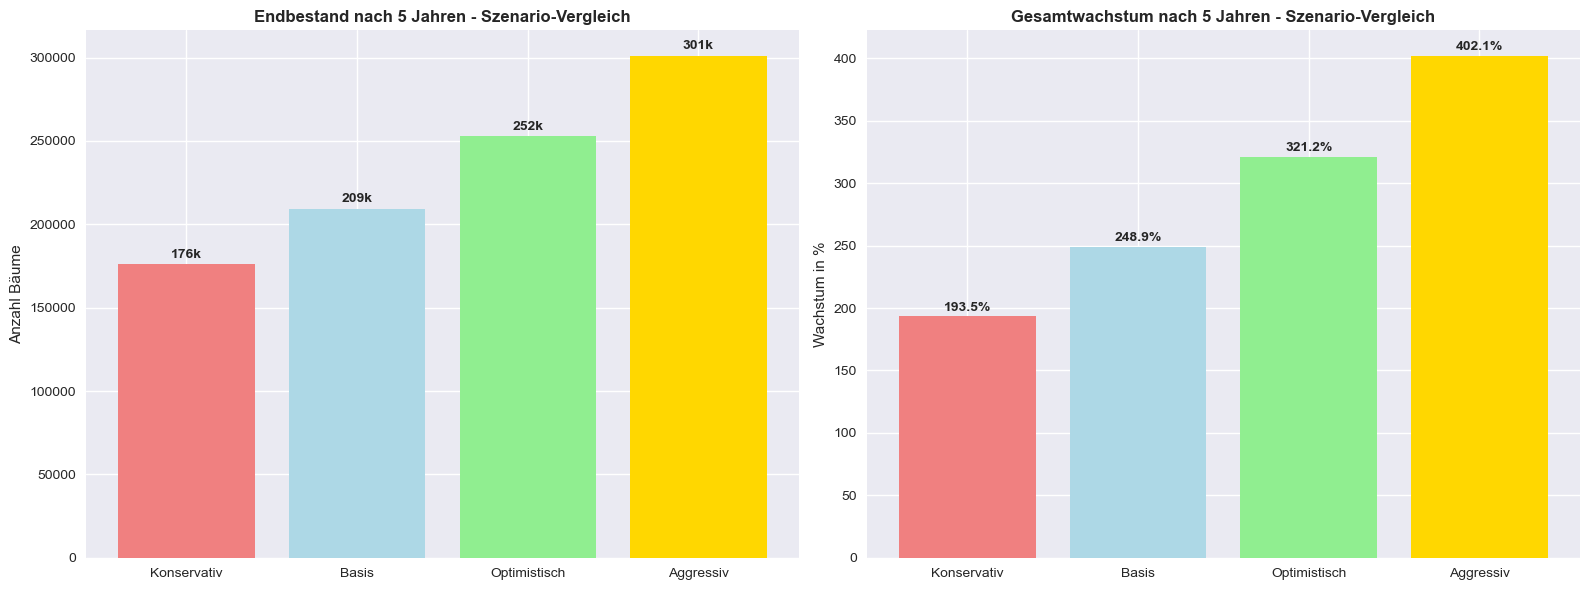

In [15]:
def szenario_analyse():
    """
    Führt eine Szenario-Analyse mit verschiedenen Parametern durch
    """
    
    print("🎭 SZENARIO-ANALYSE")
    print("=" * 60)
    
    # Definiere verschiedene Szenarien
    szenarien = {
        'Konservativ': {'wachstum': 5.0, 'zugaenge': 1500},
        'Basis': {'wachstum': 7.0, 'zugaenge': 1800},
        'Optimistisch': {'wachstum': 9.0, 'zugaenge': 2200},
        'Aggressiv': {'wachstum': 12.0, 'zugaenge': 2500}
    }
    
    szenario_ergebnisse = {}
    
    for szenario_name, parameter in szenarien.items():
        # Erstelle temporäre Prognose
        temp_prognose = AprikosenbaumPrognose()
        temp_prognose.jaehrliches_wachstum_prozent = parameter['wachstum']
        temp_prognose.monatliche_zugaenge = parameter['zugaenge']
        temp_prognose.monatlicher_wachstumsfaktor = (1 + parameter['wachstum']/100) ** (1/12)
        
        # Berechne Ergebnisse
        temp_monatsdaten = berechne_monatliche_entwicklung(temp_prognose)
        temp_jahresdaten = berechne_jaehrliche_zusammenfassung(temp_monatsdaten)
        
        end_bestand = temp_jahresdaten['Baumbestand'].iloc[-1]
        gesamtwachstum = ((end_bestand / temp_prognose.startbestand) - 1) * 100
        
        szenario_ergebnisse[szenario_name] = {
            'end_bestand': end_bestand,
            'gesamtwachstum': gesamtwachstum,
            'parameter': parameter
        }
        
        print(f"📊 {szenario_name}:")
        print(f"   Wachstum: {parameter['wachstum']}% | Zugänge: {parameter['zugaenge']:,}/Monat")
        print(f"   Endbestand: {end_bestand:,.0f} Bäume")
        print(f"   Gesamtwachstum: {gesamtwachstum:.1f}%")
        print()
    
    # Visualisiere Szenarien
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Balkendiagramm: Endbestand
    szenarien_namen = list(szenario_ergebnisse.keys())
    endbestaende = [szenario_ergebnisse[s]['end_bestand'] for s in szenarien_namen]
    
    bars1 = ax1.bar(szenarien_namen, endbestaende, color=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
    ax1.set_title('Endbestand nach 5 Jahren - Szenario-Vergleich', fontweight='bold')
    ax1.set_ylabel('Anzahl Bäume')
    ax1.ticklabel_format(style='plain', axis='y')
    
    # Werte auf Balken
    for bar, value in zip(bars1, endbestaende):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2000, 
                f'{int(value/1000)}k', ha='center', va='bottom', fontweight='bold')
    
    # Balkendiagramm: Gesamtwachstum
    wachstum_prozent = [szenario_ergebnisse[s]['gesamtwachstum'] for s in szenarien_namen]
    
    bars2 = ax2.bar(szenarien_namen, wachstum_prozent, color=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
    ax2.set_title('Gesamtwachstum nach 5 Jahren - Szenario-Vergleich', fontweight='bold')
    ax2.set_ylabel('Wachstum in %')
    
    # Werte auf Balken
    for bar, value in zip(bars2, wachstum_prozent):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return szenario_ergebnisse

# Führe Szenario-Analyse durch
szenario_ergebnisse = szenario_analyse()



## 7. Export und Speicherung

Speichere die Ergebnisse in verschiedenen Formaten für weitere Verwendung.

#set to md for deactivation
def exportiere_ergebnisse(monatsdaten, jahresdaten, statistiken):
    """
    Exportiert die Ergebnisse in verschiedene Formate
    """
    
    print("💾 DATENEXPORT")
    print("=" * 40)
    
    try:
        # Excel-Export
        with pd.ExcelWriter('aprikosenbaeume_prognose.xlsx', engine='openpyxl') as writer:
            monatsdaten.to_excel(writer, sheet_name='Monatsdaten', index=False)
            jahresdaten.to_excel(writer, sheet_name='Jahresdaten', index=False)
            
            # Statistiken als DataFrame
            statistiken_df = pd.DataFrame([statistiken])
            statistiken_df.to_excel(writer, sheet_name='Statistiken', index=False)
            
        print("✅ Excel-Datei erstellt: aprikosenbaeume_prognose.xlsx")
        
        # CSV-Export
        monatsdaten.to_csv('aprikosenbaeume_monatsdaten.csv', index=False, sep=';')
        jahresdaten.to_csv('aprikosenbaeume_jahresdaten.csv', index=False, sep=';')
        
        print("✅ CSV-Dateien erstellt:")
        print("   - aprikosenbaeume_monatsdaten.csv")
        print("   - aprikosenbaeume_jahresdaten.csv")
        
        # JSON-Export für API-Verwendung
        export_data = {
            'parameter': {
                'startdatum': prognose.startdatum.isoformat(),
                'startbestand': prognose.startbestand,
                'monatliche_zugaenge': prognose.monatliche_zugaenge,
                'jaehrliches_wachstum_prozent': prognose.jaehrliches_wachstum_prozent,
                'prognosejahre': prognose.prognosejahre
            },
            'monatsdaten': monatsdaten.to_dict('records'),
            'jahresdaten': jahresdaten.to_dict('records'),
            'statistiken': statistiken
        }
        
        import json
        with open('aprikosenbaeume_prognose.json', 'w', encoding='utf-8') as f:
            json.dump(export_data, f, ensure_ascii=False, indent=2, default=str)
        
        print("✅ JSON-Datei erstellt: aprikosenbaeume_prognose.json")
        
    except Exception as e:
        print(f"❌ Fehler beim Export: {e}")
        
    print("\n📁 Alle Dateien wurden erfolgreich erstellt!")

# Exportiere Ergebnisse
exportiere_ergebnisse(prognose.monatsdaten, prognose.jahresdaten, statistiken)



## 8. Zusammenfassung und Fazit

### Wichtige Erkenntnisse:

1. **Exponentielles Wachstum**: Der Baumbestand wächst exponentiell aufgrund der Kombination aus fixen monatlichen Zugängen und prozentualem Wachstum.

2. **Langfristige Auswirkungen**: Bereits kleine Änderungen in den Wachstumsparametern haben langfristig große Auswirkungen auf den Endbestand.

3. **Zusammensetzung des Wachstums**: Das Gesamtwachstum setzt sich aus linearen Zugängen und exponentieller Entwicklung zusammen.

### Empfehlungen:

- **Monitoring**: Regelmäßige Überprüfung der tatsächlichen Entwicklung gegen die Prognose
- **Anpassung**: Flexible Anpassung der Parameter basierend auf realen Daten
- **Szenario-Planung**: Verwendung der Szenario-Analyse für Risikobewertung

### Nächste Schritte:

1. Regelmäßige Aktualisierung der Prognose mit realen Daten
2. Er